Dot count: 7


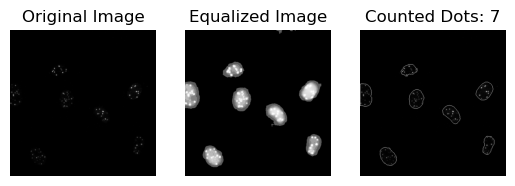

In [24]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage import exposure
# Load the image in grayscale
image_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged-pml-images-No-arsenic/flattened_position_1_C1.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
denoised_image = cv2.fastNlMeansDenoising(image, h=10, templateWindowSize=7, searchWindowSize=21)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(denoised_image)

# Apply binary thresholding
_, binary_image = cv2.threshold(equalized_image, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed

# Find contours and count dots
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
dot_count = len(contours)
print(f"Dot count: {dot_count}")

# Display result
result_image = cv2.drawContours(image.copy(), contours, -1, (255, 0, 0), 1)
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
plt.title("Original Image"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image"), plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(result_image, cmap='gray')
plt.title(f"Counted Dots: {dot_count}"), plt.axis("off")
plt.show()